In [1]:
import pandas as pd
import random

In [2]:
word_counts_old = dict()
word_counts_new = dict()
word_counts_target = dict()
joints = {"neutral_target_actual": {}, "contradiction_target_actual": {}, "entailment_target_actual": {},"neutral_train_old": {}, "contradiction_train_old": {}, "entailment_train_old": {}, "neutral_train_new": {}, "contradiction_train_new": {}, "entailment_train_new": {}, "neutral_old_target": {}, "contradiction_old_target": {}, "entailment_old_target": {}, "neutral_new_target": {}, "contradiction_new_target": {}, "entailment_new_target": {}, "correct_old": {}, "correct_new": {}}

In [3]:
def add_word(w, d):
    if w in d:
        d[w] += 1
    else:
        d[w] = 1

In [4]:
# filename_new = "new_method1_eval/alpha_0.2_beta_0.1_min0.8,scaled--samples/train_preds"
# filename_old = "new_method1_eval/train_preds"
# labels_old = "../data/snli_1.0/cl_snli_train_lbl_file"
# source_old = "../data/snli_1.0/cl_snli_train_source_file"
# source = "min0.8,scaled--samples.txt"
# labels_new = "min0.8,scaled--samples_labels.txt"

target_source_name = "../data/multinli_1.0/cl_multinli_train_source_file"
target_labels_name = "../data/multinli_1.0/cl_multinli_train_lbl_file"
train_old_source = "../data/snli_1.0/cl_snli_train_source_file"
train_old_labels = "../data/snli_1.0/cl_snli_train_lbl_file"
model_old = "report/method1/alpha_0.2_beta_0.1/mnli/train_preds"
model_new = "report/method1/alpha_0.2_beta_0.1_min0.9,scaled--samples/mnli/train_preds"
train_new_source = "min0.9,scaled--samples.txt"
train_new_labels = "min0.9,scaled--samples_labels.txt"

# filename_new = "report/method1/alpha_0.2_beta_0.1_min0.8,scaled--samples/mnli/train_preds"
# filename_old = "report/method1/alpha_0.2_beta_0.1/mnli/train_preds"
# labels = "../data/multinli_1.0/cl_multinli_train_lbl_file"
# source = "../data/multinli_1.0/cl_multinli_train_source_file"
# labels_new = "../data/multinli_1.0/cl_multinli_train_lbl_file"

min_conditional = 0.9
min_support = 20
preds_new = open(model_new, 'r')
preds_old = open(model_old, 'r')
train_old_labels = open(train_old_labels, 'r')
target_labels = open(target_labels_name, 'r')
train_old_source = open(train_old_source, 'r')
train_new_labels = open(train_new_labels, 'r')
train_new_source = open(train_new_source, 'r')
if "multinli" in target_source_name:
    target_source = open(target_source_name, 'rb')
else:
    target_source = open(target_source_name, 'r')

In [5]:
num_samples = 0

try:
    while True:
        label = next(train_old_labels).replace("\n", "")
        hypothesis = set(next(train_old_source).lower().split("|||")[1].replace("\n", "").split(" "))
        for word in hypothesis:
            add_word(word, word_counts_old)
            add_word(word, joints[label + "_train_old"])
        num_samples += 1
        if num_samples % 20000 == 0:
            print(num_samples, "completed")
except StopIteration:
    pass

20000 completed
40000 completed
60000 completed
80000 completed
100000 completed
120000 completed
140000 completed
160000 completed
180000 completed
200000 completed
220000 completed
240000 completed
260000 completed
280000 completed
300000 completed
320000 completed
340000 completed
360000 completed
380000 completed
400000 completed
420000 completed
440000 completed
460000 completed
480000 completed
500000 completed
520000 completed
540000 completed


In [6]:
num_samples = 0

try:
    while True:
        label = next(train_new_labels).replace("\n", "")
        hypothesis = set(next(train_new_source).lower().split("|||")[1].replace("\n", "").split(" "))
        for word in hypothesis:
            add_word(word, word_counts_new)
            add_word(word, joints[label + "_train_new"])
        num_samples += 1
        if num_samples % 20000 == 0:
            print(num_samples, "completed")
except StopIteration:
    pass

20000 completed
40000 completed
60000 completed
80000 completed
100000 completed
120000 completed
140000 completed
160000 completed
180000 completed
200000 completed
220000 completed
240000 completed
260000 completed
280000 completed
300000 completed
320000 completed
340000 completed
360000 completed
380000 completed
400000 completed
420000 completed
440000 completed
460000 completed
480000 completed
500000 completed
520000 completed
540000 completed


In [7]:
num_samples = 0

try:
    while True:
        pred_old = next(preds_old).replace("\n", "")
        label = next(target_labels).replace("\n", "")
        if "multinli" in target_source_name:
            try:
                hypothesis = set(next(target_source).decode(encoding='UTF-8').lower().split("|||")[1].replace("\n", "").split(" "))
            except UnicodeDecodeError:
                pass
        else:
            hypothesis = set(next(target_source).lower().split("|||")[1].replace("\n", "").split(" "))
        for word in hypothesis:
            add_word(word, word_counts_target)
            add_word(word, joints[pred_old + "_old_target"])
            add_word(word, joints[label + "_target_actual"])
            if pred_old == label:
                add_word(word, joints["correct_old"])
        num_samples += 1
        if num_samples % 20000 == 0:
            print(num_samples, "completed")
except StopIteration:
    pass

20000 completed
40000 completed
60000 completed
80000 completed
100000 completed
120000 completed
140000 completed
160000 completed
180000 completed
200000 completed
220000 completed
240000 completed
260000 completed
280000 completed
300000 completed
320000 completed
340000 completed
360000 completed
380000 completed


In [8]:
target_labels = open(target_labels_name, 'r')
if "multinli" in target_source_name:
    target_source = open(target_source_name, 'rb')
else:
    target_source = open(target_source_name, 'r')

In [9]:
num_samples = 0

try:
    while True:
        pred_new = next(preds_new).replace("\n", "")
        label = next(target_labels).replace("\n", "")
        if "multinli" in target_source_name:
            try:
                hypothesis = set(next(target_source).decode(encoding='UTF-8').lower().split("|||")[1].replace("\n", "").split(" "))
            except UnicodeDecodeError:
                pass
        else:
            hypothesis = set(next(target_source).lower().split("|||")[1].replace("\n", "").split(" "))
        for word in hypothesis:
            add_word(word, joints[pred_new + "_new_target"])
            if pred_new == label:
                add_word(word, joints["correct_new"])
        num_samples += 1
        if num_samples % 20000 == 0:
            print(num_samples, "completed")
except StopIteration:
    pass

20000 completed
40000 completed
60000 completed
80000 completed
100000 completed
120000 completed
140000 completed
160000 completed
180000 completed
200000 completed
220000 completed
240000 completed
260000 completed
280000 completed
300000 completed
320000 completed
340000 completed
360000 completed
380000 completed


In [10]:
words = pd.DataFrame.from_dict(word_counts_old, orient='index').rename(columns={0: "count_old"})
words = words.join(pd.DataFrame.from_dict(word_counts_new, orient='index').rename(columns={0: "count_new"}), how="outer")
words = words.join(pd.DataFrame.from_dict(word_counts_target, orient='index').rename(columns={0: "count_target"}), how="outer")
words.head()

,count_old,count_new,count_target
!,161.0,160.0,2140.0
#,28.0,29.0,4.0
$,28.0,31.0,1770.0
%,11.0,12.0,1033.0
&,37.0,44.0,147.0


In [11]:
for joint in joints.keys():
    words = words.join(pd.DataFrame.from_dict(joints[joint], orient='index').rename(columns={0: joint}), how="outer")
words.head()

,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,neutral_train_new,contradiction_train_new,entailment_train_new,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new
!,161.0,160.0,2140.0,523.0,938.0,679.0,63.0,78.0,20.0,64.0,73.0,23.0,733.0,682.0,725.0,665.0,760.0,715.0,688.0,738.0
#,28.0,29.0,4.0,1.0,NaN,3.0,10.0,8.0,10.0,10.0,9.0,10.0,1.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0
$,28.0,31.0,1770.0,732.0,441.0,597.0,21.0,4.0,3.0,20.0,6.0,5.0,600.0,582.0,588.0,528.0,663.0,579.0,625.0,552.0
%,11.0,12.0,1033.0,594.0,225.0,214.0,6.0,3.0,2.0,6.0,4.0,2.0,337.0,348.0,348.0,329.0,356.0,348.0,335.0,332.0
&,37.0,44.0,147.0,47.0,45.0,55.0,15.0,16.0,6.0,18.0,17.0,9.0,53.0,46.0,48.0,43.0,58.0,46.0,52.0,50.0


In [12]:
words = words.sort_values("count_old", ascending=False).reset_index().rename(columns={"index": "word"})
words.head()

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,contradiction_train_new,entailment_train_new,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new
0,.,439149.0,434184.0,365845.0,122526.0,122388.0,120931.0,145492.0,147546.0,146111.0,...,143798.0,146417.0,122830.0,118551.0,124464.0,112477.0,131467.0,121901.0,122353.0,122038.0
1,a,329074.0,327958.0,76991.0,27448.0,20601.0,28942.0,109939.0,106046.0,113089.0,...,104871.0,113918.0,25897.0,24770.0,26324.0,23502.0,27730.0,25759.0,25912.0,25673.0
2,the,242630.0,239113.0,195704.0,71353.0,61540.0,62811.0,91951.0,90757.0,59922.0,...,88796.0,59999.0,65896.0,63294.0,66514.0,60184.0,70494.0,65026.0,65364.0,64693.0
3,is,221473.0,217094.0,70404.0,23508.0,23649.0,23247.0,73973.0,75753.0,71747.0,...,72662.0,71411.0,23649.0,22689.0,24066.0,21774.0,25186.0,23444.0,23532.0,23390.0
4,are,125846.0,123048.0,40376.0,14393.0,12872.0,13111.0,41094.0,40852.0,43900.0,...,39677.0,43300.0,13708.0,12956.0,13712.0,12422.0,14406.0,13548.0,13593.0,13434.0


In [13]:
words["neutral_target_actual"] = words["neutral_target_actual"] / words["count_target"]
words["contradiction_target_actual"] = words["contradiction_target_actual"] / words["count_target"]
words["entailment_target_actual"] = words["entailment_target_actual"] / words["count_target"]

words["neutral_train_old"] = words["neutral_train_old"] / words["count_old"]
words["contradiction_train_old"] = words["contradiction_train_old"] / words["count_old"]
words["entailment_train_old"] = words["entailment_train_old"] / words["count_old"]

words["neutral_train_new"] = words["neutral_train_new"] / words["count_new"]
words["contradiction_train_new"] = words["contradiction_train_new"] / words["count_new"]
words["entailment_train_new"] = words["entailment_train_new"] / words["count_new"]

words["neutral_old_target"] = words["neutral_old_target"] / words["count_target"]
words["contradiction_old_target"] = words["contradiction_old_target"] / words["count_target"]
words["entailment_old_target"] = words["entailment_old_target"] / words["count_target"]

words["neutral_new_target"] = words["neutral_new_target"] / words["count_target"]
words["contradiction_new_target"] = words["contradiction_new_target"] / words["count_target"]
words["entailment_new_target"] = words["entailment_new_target"] / words["count_target"]

words["correct_old_acc"] = words["correct_old"] / words["count_target"]
words["correct_new_acc"] = words["correct_new"] / words["count_target"]
words.head()

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
0,.,439149.0,434184.0,365845.0,0.334912,0.334535,0.330553,0.331304,0.335982,0.332714,...,0.335743,0.324047,0.340210,0.307444,0.359352,0.333204,122353.0,122038.0,0.334439,0.333578
1,a,329074.0,327958.0,76991.0,0.356509,0.267577,0.375914,0.334086,0.322256,0.343658,...,0.336364,0.321726,0.341910,0.305256,0.360172,0.334572,25912.0,25673.0,0.336559,0.333455
2,the,242630.0,239113.0,195704.0,0.364597,0.314454,0.320949,0.378976,0.374055,0.246969,...,0.336713,0.323417,0.339870,0.307526,0.360207,0.332267,65364.0,64693.0,0.333994,0.330566
3,is,221473.0,217094.0,70404.0,0.333901,0.335904,0.330194,0.334005,0.342042,0.323954,...,0.335904,0.322269,0.341827,0.309272,0.357735,0.332992,23532.0,23390.0,0.334242,0.332225
4,are,125846.0,123048.0,40376.0,0.356474,0.318803,0.324723,0.326542,0.324619,0.348839,...,0.339509,0.320884,0.339608,0.307658,0.356796,0.335546,13593.0,13434.0,0.336660,0.332722


In [14]:
words = words[(words["neutral_train_old"] > min_conditional) | (words["contradiction_train_old"] > min_conditional) | (words["entailment_train_old"] > min_conditional)]
# words = words[(words["neutral_old_actual"] > min_conditional) | (words["contradiction_old_actual"] > min_conditional) | (words["entailment_old_actual"] > min_conditional)]
words.head()

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
196,nobody,2377.0,16.0,875.0,0.201143,0.693714,0.105143,0.004207,0.995372,0.000421,...,0.336000,0.340571,0.323429,0.309714,0.370286,0.320000,291.0,292.0,0.332571,0.333714
479,cats,818.0,121.0,257.0,0.357977,0.400778,0.241245,0.044010,0.936430,0.019560,...,0.326848,0.287938,0.385214,0.268482,0.342412,0.389105,98.0,97.0,0.381323,0.377432
583,vacation,632.0,173.0,235.0,0.442553,0.268085,0.289362,0.909810,0.072785,0.017405,...,0.336170,0.289362,0.374468,0.310638,0.336170,0.353191,72.0,83.0,0.306383,0.353191
621,nothing,585.0,93.0,2741.0,0.127691,0.757388,0.114922,0.047863,0.928205,0.023932,...,0.334185,0.325064,0.340752,0.306822,0.363371,0.329807,906.0,945.0,0.330536,0.344765
868,least,388.0,51.0,1050.0,0.334286,0.298095,0.367619,0.064433,0.010309,0.925258,...,0.311429,0.325714,0.362857,0.313333,0.369524,0.317143,376.0,359.0,0.358095,0.341905


In [15]:
print(words.shape)
words = words[words["count_old"] > min_support]
words.shape

(15796, 23)


(81, 23)

In [16]:
cache = words.copy()

In [17]:
cache

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
196,nobody,2377.0,16.0,875.0,0.201143,0.693714,0.105143,0.004207,0.995372,0.000421,...,0.336000,0.340571,0.323429,0.309714,0.370286,0.320000,291.0,292.0,0.332571,0.333714
479,cats,818.0,121.0,257.0,0.357977,0.400778,0.241245,0.044010,0.936430,0.019560,...,0.326848,0.287938,0.385214,0.268482,0.342412,0.389105,98.0,97.0,0.381323,0.377432
583,vacation,632.0,173.0,235.0,0.442553,0.268085,0.289362,0.909810,0.072785,0.017405,...,0.336170,0.289362,0.374468,0.310638,0.336170,0.353191,72.0,83.0,0.306383,0.353191
621,nothing,585.0,93.0,2741.0,0.127691,0.757388,0.114922,0.047863,0.928205,0.023932,...,0.334185,0.325064,0.340752,0.306822,0.363371,0.329807,906.0,945.0,0.330536,0.344765
868,least,388.0,51.0,1050.0,0.334286,0.298095,0.367619,0.064433,0.010309,0.925258,...,0.311429,0.325714,0.362857,0.313333,0.369524,0.317143,376.0,359.0,0.358095,0.341905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,pushups,22.0,8.0,NaN,NaN,NaN,NaN,0.090909,0.909091,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5265,frown,22.0,1.0,24.0,0.166667,0.500000,0.333333,NaN,1.000000,NaN,...,0.333333,0.333333,0.333333,0.250000,0.375000,0.375000,8.0,6.0,0.333333,0.250000
5358,triathlon,22.0,8.0,5.0,0.200000,0.400000,0.400000,0.909091,0.090909,NaN,...,0.200000,0.400000,0.400000,0.400000,0.400000,0.200000,1.0,1.0,0.200000,0.200000
5372,videogames,21.0,8.0,1.0,NaN,1.000000,NaN,0.095238,0.904762,NaN,...,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [18]:
(cache["correct_new_acc"] - cache["correct_old_acc"]).mean()

-0.009969541293850505

In [22]:
cache[cache["correct_new_acc"] > cache["correct_old_acc"]]

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
196,nobody,2377.0,16.0,875.0,0.201143,0.693714,0.105143,0.004207,0.995372,0.000421,...,0.336000,0.340571,0.323429,0.309714,0.370286,0.320000,291.0,292.0,0.332571,0.333714
583,vacation,632.0,173.0,235.0,0.442553,0.268085,0.289362,0.909810,0.072785,0.017405,...,0.336170,0.289362,0.374468,0.310638,0.336170,0.353191,72.0,83.0,0.306383,0.353191
621,nothing,585.0,93.0,2741.0,0.127691,0.757388,0.114922,0.047863,0.928205,0.023932,...,0.334185,0.325064,0.340752,0.306822,0.363371,0.329807,906.0,945.0,0.330536,0.344765
921,championship,360.0,67.0,45.0,0.400000,0.355556,0.244444,0.950000,0.050000,NaN,...,0.355556,0.355556,0.288889,0.400000,0.288889,0.311111,9.0,18.0,0.200000,0.400000
1015,anything,319.0,76.0,3314.0,0.177127,0.671998,0.150875,0.056426,0.909091,0.034483,...,0.341279,0.329813,0.328908,0.300845,0.372661,0.326494,1095.0,1166.0,0.330416,0.351841
1473,impress,178.0,6.0,31.0,0.483871,0.193548,0.322581,0.971910,0.016854,0.011236,...,0.322581,0.225806,0.451613,0.290323,0.290323,0.419355,6.0,11.0,0.193548,0.354839
1591,upcoming,161.0,28.0,68.0,0.485294,0.161765,0.352941,0.900621,0.068323,0.031056,...,0.352941,0.323529,0.323529,0.352941,0.323529,0.323529,19.0,27.0,0.279412,0.397059
1746,silent,139.0,40.0,289.0,0.117647,0.754325,0.128028,0.064748,0.920863,0.014388,...,0.318339,0.363322,0.318339,0.283737,0.394464,0.321799,105.0,108.0,0.363322,0.373702
1861,beds,127.0,37.0,58.0,0.344828,0.258621,0.396552,0.031496,0.913386,0.055118,...,0.327586,0.310345,0.362069,0.310345,0.258621,0.431034,22.0,26.0,0.379310,0.448276
2176,belongs,100.0,12.0,47.0,0.191489,0.276596,0.531915,0.920000,0.030000,0.050000,...,0.319149,0.361702,0.319149,0.276596,0.468085,0.255319,15.0,16.0,0.319149,0.340426


In [20]:
subset = cache[(words["neutral_target_actual"] > 0.5) | (words["contradiction_target_actual"] > 0.5) | (words["entailment_target_actual"] > 0.5)]
subset

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
196,nobody,2377.0,16.0,875.0,0.201143,0.693714,0.105143,0.004207,0.995372,0.000421,...,0.336000,0.340571,0.323429,0.309714,0.370286,0.320000,291.0,292.0,0.332571,0.333714
621,nothing,585.0,93.0,2741.0,0.127691,0.757388,0.114922,0.047863,0.928205,0.023932,...,0.334185,0.325064,0.340752,0.306822,0.363371,0.329807,906.0,945.0,0.330536,0.344765
1015,anything,319.0,76.0,3314.0,0.177127,0.671998,0.150875,0.056426,0.909091,0.034483,...,0.341279,0.329813,0.328908,0.300845,0.372661,0.326494,1095.0,1166.0,0.330416,0.351841
1145,frowning,261.0,45.0,15.0,0.133333,0.733333,0.133333,0.022989,0.946360,0.030651,...,0.466667,0.266667,0.266667,0.266667,0.200000,0.533333,6.0,5.0,0.400000,0.333333
1746,silent,139.0,40.0,289.0,0.117647,0.754325,0.128028,0.064748,0.920863,0.014388,...,0.318339,0.363322,0.318339,0.283737,0.394464,0.321799,105.0,108.0,0.363322,0.373702
1991,goldfish,114.0,27.0,5.0,0.600000,0.200000,0.200000,0.070175,0.903509,0.026316,...,0.400000,0.400000,0.200000,0.200000,0.400000,0.400000,2.0,1.0,0.400000,0.200000
2176,belongs,100.0,12.0,47.0,0.191489,0.276596,0.531915,0.920000,0.030000,0.050000,...,0.319149,0.361702,0.319149,0.276596,0.468085,0.255319,15.0,16.0,0.319149,0.340426
2230,mashed,97.0,4.0,15.0,0.533333,0.200000,0.266667,0.041237,0.958763,NaN,...,0.333333,0.333333,0.333333,0.333333,0.200000,0.466667,4.0,4.0,0.266667,0.266667
2722,zombies,71.0,13.0,3.0,0.666667,0.333333,NaN,0.070423,0.901408,0.028169,...,0.666667,NaN,0.333333,0.666667,NaN,0.333333,1.0,1.0,0.333333,0.333333
2955,shaven,61.0,10.0,8.0,0.125000,0.750000,0.125000,0.032787,0.934426,0.032787,...,0.250000,0.375000,0.375000,0.500000,0.250000,0.250000,1.0,NaN,0.125000,NaN


In [34]:
(subset["correct_new_acc"] - subset["correct_old_acc"]).mean()

0.007502564316477152

In [39]:
k, num = None, None
for i in range(15, 100):
    subset = cache.sort_values(by="count_old", ascending=False).head(i)
    cur = (subset["correct_new_acc"] - subset["correct_old_acc"]).mean()
    # print(cur)
    if k is None:
        k = i
        num = cur
    elif cur >= num:
        k = i
        num = cur
k, num

(15, 0.02167603198057836)

In [28]:
subset = cache[cache['count_old'] > 50]

In [30]:
cache[cache['count_old'] > 50]

,word,count_old,count_new,count_target,neutral_target_actual,contradiction_target_actual,entailment_target_actual,neutral_train_old,contradiction_train_old,entailment_train_old,...,neutral_old_target,contradiction_old_target,entailment_old_target,neutral_new_target,contradiction_new_target,entailment_new_target,correct_old,correct_new,correct_old_acc,correct_new_acc
196,nobody,2377.0,16.0,875.0,0.201143,0.693714,0.105143,0.004207,0.995372,0.000421,...,0.336000,0.340571,0.323429,0.309714,0.370286,0.320000,291.0,292.0,0.332571,0.333714
479,cats,818.0,121.0,257.0,0.357977,0.400778,0.241245,0.044010,0.936430,0.019560,...,0.326848,0.287938,0.385214,0.268482,0.342412,0.389105,98.0,97.0,0.381323,0.377432
583,vacation,632.0,173.0,235.0,0.442553,0.268085,0.289362,0.909810,0.072785,0.017405,...,0.336170,0.289362,0.374468,0.310638,0.336170,0.353191,72.0,83.0,0.306383,0.353191
621,nothing,585.0,93.0,2741.0,0.127691,0.757388,0.114922,0.047863,0.928205,0.023932,...,0.334185,0.325064,0.340752,0.306822,0.363371,0.329807,906.0,945.0,0.330536,0.344765
868,least,388.0,51.0,1050.0,0.334286,0.298095,0.367619,0.064433,0.010309,0.925258,...,0.311429,0.325714,0.362857,0.313333,0.369524,0.317143,376.0,359.0,0.358095,0.341905
921,championship,360.0,67.0,45.0,0.400000,0.355556,0.244444,0.950000,0.050000,NaN,...,0.355556,0.355556,0.288889,0.400000,0.288889,0.311111,9.0,18.0,0.200000,0.400000
992,quietly,328.0,66.0,140.0,0.221429,0.400000,0.378571,0.067073,0.905488,0.027439,...,0.378571,0.321429,0.300000,0.321429,0.385714,0.292857,51.0,46.0,0.364286,0.328571
1015,anything,319.0,76.0,3314.0,0.177127,0.671998,0.150875,0.056426,0.909091,0.034483,...,0.341279,0.329813,0.328908,0.300845,0.372661,0.326494,1095.0,1166.0,0.330416,0.351841
1071,siblings,292.0,60.0,36.0,0.361111,0.222222,0.416667,0.931507,0.037671,0.030822,...,0.277778,0.388889,0.333333,0.166667,0.444444,0.388889,12.0,8.0,0.333333,0.222222
1145,frowning,261.0,45.0,15.0,0.133333,0.733333,0.133333,0.022989,0.946360,0.030651,...,0.466667,0.266667,0.266667,0.266667,0.200000,0.533333,6.0,5.0,0.400000,0.333333


In [41]:
cache["improvement"] = (cache['correct_new_acc'] - cache['correct_old_acc']) / cache['correct_old_acc']

<AxesSubplot:xlabel='word'>

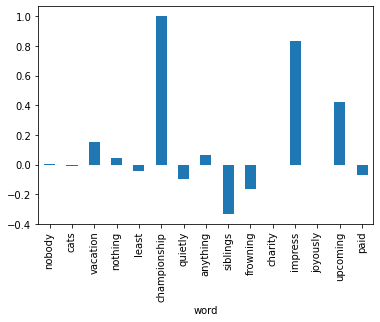

In [45]:
cache.sort_values(by="count_old", ascending=False).head(15).set_index('word')['improvement'].plot(kind='bar')

In [47]:
a = "               precision    recall  f1-score   support\n\n   entailment       0.46      0.58      0.52      3463\n      neutral       0.44      0.44      0.44      3129\ncontradiction       0.57      0.42      0.48      3240\n\n     accuracy                           0.48      9832\n    macro avg       0.49      0.48      0.48      9832\n weighted avg       0.49      0.48      0.48      9832\n"

In [48]:
a

'               precision    recall  f1-score   support\n\n   entailment       0.46      0.58      0.52      3463\n      neutral       0.44      0.44      0.44      3129\ncontradiction       0.57      0.42      0.48      3240\n\n     accuracy                           0.48      9832\n    macro avg       0.49      0.48      0.48      9832\n weighted avg       0.49      0.48      0.48      9832\n'